# 0. Introduction

In [0]:
%matplotlib inline

Example based on: Deep Learning with Python by Francois Chollet:
https://www.manning.com/books/deep-learning-with-python

In [3]:
import keras
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


# 1. Load data

The MNIST database of handwritten digit has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


# 2. Inspect data

Try to get a feel for the data you are using to train and test your neural network. 

## Training data

- Training data will be used to train our neural network to recognize hand-written digits.
- MNIST provides 60000 labeled training images, each 28x28 pixels

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [0]:
def show_image(images, labels, index):
    img = images[index].reshape((28,28))
    label = labels[index]
    plt.imshow(img)
    plt.title(label)
    plt.show()

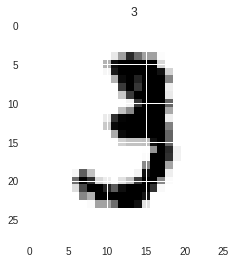

In [8]:
show_image(train_images, train_labels, 10)

## Test data

- Test data will be used to validate how good our network performs on data it has never seen.
- MNIST provides 10000 test images, each 28x28.
- It's important to note that these should never be used in the training cycle. A 'test set' should never contain images the network has already seen during training. (read more: [Model Selection and Train/Validation/Test Sets](https://www.coursera.org/lecture/machine-learning/model-selection-and-train-validation-test-sets-QGKbr) and [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/))

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels.shape

(10000,)

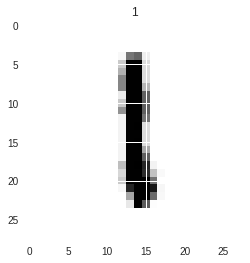

In [11]:
show_image(test_images, test_labels, 168)

# 3. Network architecture

## 3.1. ConvNet (Feature extraction)

Define the network architecture that will be used for training

- how many layers 
- which type of layer
    - Convolution: #channels, kernel size, activation
    - MaxPool: matrix size

Important: ConvNets take as input tensors of shape: (image_height, image_width, channels)

**Note:**

Convolutional layers learn local patterns (features that can appear anywhere in the image)

Dense layers learn global patterns.

In [0]:
sess = tf.get_default_session()
K.set_session(sess)

**A bit of tweeking to enable inferencing the model from go code:**
* Naming of the inputlayer of the nn
* Naming of the outputlayer of the nn
* Tensorflow session
* Exporting the named and tagged model from Tensorflow

In [0]:
network = models.Sequential()
network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1), name="inputLayer"))
network.add(layers.MaxPool2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPool2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))

## Calculate the number of parameters

number_of_filters * (filter_height * filter_width * features + 1)

**For layer 1:**

number_of_filters: 32

filter_height: 3

filter_width: 3

features: 1 (in the first layer this is the RGB channels, later layers are the feature maps generated by the convolutions)

32 * (3 * 3 * 1 + 1) = 320

In [14]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [15]:
[n.name for n in tf.get_default_graph().as_graph_def().node]

['inputLayer_input',
 'inputLayer/random_uniform/shape',
 'inputLayer/random_uniform/min',
 'inputLayer/random_uniform/max',
 'inputLayer/random_uniform/RandomUniform',
 'inputLayer/random_uniform/sub',
 'inputLayer/random_uniform/mul',
 'inputLayer/random_uniform',
 'inputLayer/kernel',
 'inputLayer/kernel/Assign',
 'inputLayer/kernel/read',
 'inputLayer/Const',
 'inputLayer/bias',
 'inputLayer/bias/Assign',
 'inputLayer/bias/read',
 'inputLayer/convolution/dilation_rate',
 'inputLayer/convolution',
 'inputLayer/BiasAdd',
 'inputLayer/Relu',
 'max_pooling2d_1/MaxPool',
 'conv2d_1/random_uniform/shape',
 'conv2d_1/random_uniform/min',
 'conv2d_1/random_uniform/max',
 'conv2d_1/random_uniform/RandomUniform',
 'conv2d_1/random_uniform/sub',
 'conv2d_1/random_uniform/mul',
 'conv2d_1/random_uniform',
 'conv2d_1/kernel',
 'conv2d_1/kernel/Assign',
 'conv2d_1/kernel/read',
 'conv2d_1/Const',
 'conv2d_1/bias',
 'conv2d_1/bias/Assign',
 'conv2d_1/bias/read',
 'conv2d_1/convolution/dilation_ra

## 3.2. Classifier layer

In [0]:
network.add(layers.Flatten())
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(10, activation='softmax', name="inferenceLayer"))

In [17]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [18]:
[n.name for n in tf.get_default_graph().as_graph_def().node]

['inputLayer_input',
 'inputLayer/random_uniform/shape',
 'inputLayer/random_uniform/min',
 'inputLayer/random_uniform/max',
 'inputLayer/random_uniform/RandomUniform',
 'inputLayer/random_uniform/sub',
 'inputLayer/random_uniform/mul',
 'inputLayer/random_uniform',
 'inputLayer/kernel',
 'inputLayer/kernel/Assign',
 'inputLayer/kernel/read',
 'inputLayer/Const',
 'inputLayer/bias',
 'inputLayer/bias/Assign',
 'inputLayer/bias/read',
 'inputLayer/convolution/dilation_rate',
 'inputLayer/convolution',
 'inputLayer/BiasAdd',
 'inputLayer/Relu',
 'max_pooling2d_1/MaxPool',
 'conv2d_1/random_uniform/shape',
 'conv2d_1/random_uniform/min',
 'conv2d_1/random_uniform/max',
 'conv2d_1/random_uniform/RandomUniform',
 'conv2d_1/random_uniform/sub',
 'conv2d_1/random_uniform/mul',
 'conv2d_1/random_uniform',
 'conv2d_1/kernel',
 'conv2d_1/kernel/Assign',
 'conv2d_1/kernel/read',
 'conv2d_1/Const',
 'conv2d_1/bias',
 'conv2d_1/bias/Assign',
 'conv2d_1/bias/read',
 'conv2d_1/convolution/dilation_ra

# 4. Compilation Step

In the compilation step we define the:

- the loss function
- the optimizer
- the evaluation metric

In [0]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# 5. Data Preparation

Before feeding the data into the network for training, we make sure it is formatted properly.

## Prepare the images

In [0]:
train_images_reshaped = train_images.reshape((60000, 28, 28, 1))
test_images_reshaped = test_images.reshape((10000, 28, 28, 1))

In [21]:
train_images_reshaped.shape

(60000, 28, 28, 1)

In [0]:
train_images_transformed = train_images_reshaped.astype('float32') / 255
test_images_transformed = test_images_reshaped.astype('float32') / 255

## Prepare the labels

In [0]:
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

In [24]:
train_labels_categorical[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# 6. Network summary

In [25]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

# 7. Train the network

Feed the training images and labels to the network.

Two additional parameters need to be supplied:

- epochs: how many times the network will look at the entire dataset. 
- batch_size: how many images will be put through the network at one time.

In [26]:
network.fit(train_images_transformed, train_labels_categorical, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.2199 - acc: 0.9313
Epoch 2/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0547 - acc: 0.9830
Epoch 3/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0365 - acc: 0.9892
Epoch 4/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0275 - acc: 0.9914
Epoch 5/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0213 - acc: 0.9933


# 8. Test the network

Use the test set (which the network has not seen yet) to test how well the network will perform on images it has not seen yet:

In [27]:
test_loss, test_acc = network.evaluate(test_images_transformed, test_labels_categorical)

10000/10000 [==============================] - 1s 89us/step


In [28]:
print('test_acc; ', test_acc)

test_acc;  0.992


# 9. Export the network

In [31]:
builder = tf.saved_model.builder.SavedModelBuilder("myModel")

with tf.Session(graph=tf.Graph()) as sess:
    builder.add_meta_graph_and_variables(sess,
                                  ["myTag"]
                                  
                                  )
    
builder.save()  
sess.close()

INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: myModel/saved_model.pb


In [0]:
!rm -rf myModel